$ X_{t+1}= \begin{cases}
				Y, \text{ con probabilidad } \alpha(X_t,Y):=\min\left( 1,\frac{\pi(Y) p(X_t \vert Y)}{\pi(X_t) p(Y \vert X_t)} \right) \\
				X_t, \text{ con probabilidad } 1-\alpha(X_t,Y)
    \end{cases}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
gaussiana=lambda mu,sigma,x:np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

In [3]:
#Función gaussiana
gaussiana(1,1,1)

0.3989422804014327

In [4]:
mu=-10
sigma=2
X=np.random.standard_t(2)
yes=[]
for i in range(10000):
    Y=X+np.random.uniform(-1,1)
    p=min(1,gaussiana(mu,sigma,Y)/gaussiana(mu,sigma,X))
    u=np.random.uniform(0,1)
    if p>u:
        X=Y
    yes.append(X)

<IPython.core.display.Javascript object>


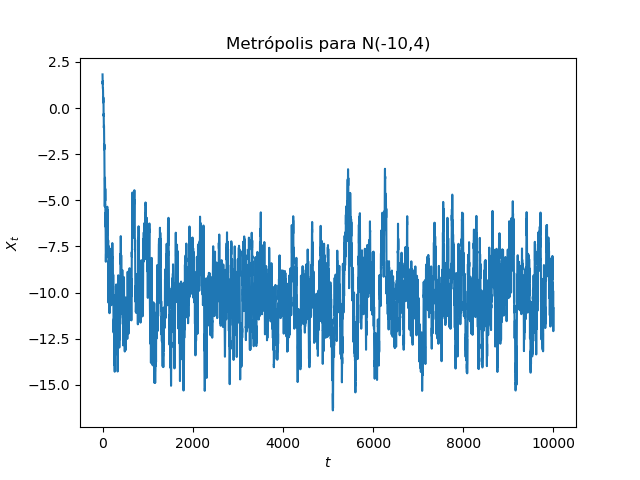

Text(0.5,1,'Metrópolis para N(-10,4)')

In [12]:
%matplotlib notebook
plt.plot(yes)
plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.title('Metrópolis para N({0},{1})'.format(mu,sigma**2))

<IPython.core.display.Javascript object>


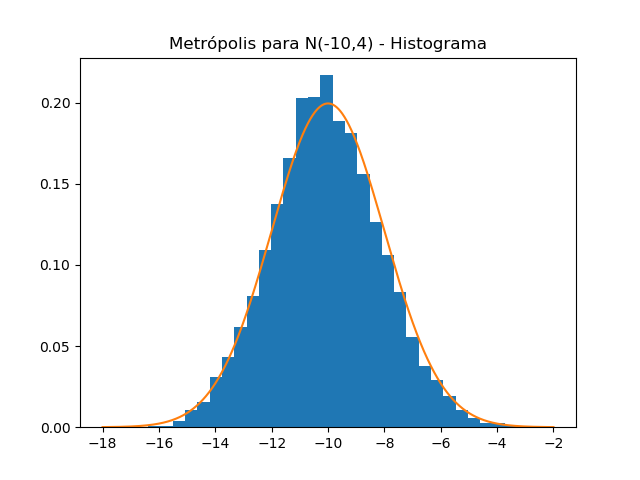

In [13]:
%matplotlib notebook
plt.hist(yes[100:],bins=30,density=True)
X0=np.linspace(mu-4*sigma,mu+4*sigma,1000)
Y0=[gaussiana(mu,sigma,x) for x in X0]
plt.plot(X0,Y0)
plt.title('Metrópolis para N({0},{1}) - Histograma'.format(mu,sigma**2))
plt.show()

# Modelo de Ising en una gráfica de Erdös-Rényi

In [7]:
#Número de nodos
n=30

#Probabilidad de conexión (=c/N)
p=0.3

#Gráfica de Poisson (Erdős-Rényi) y matriz de adyacencia
G=nx.erdos_renyi_graph(n,p,seed=None,directed=False)
A=nx.adjacency_matrix(G).toarray()

#Intensidad de la interacción
J=3

#Campo externo
h=1

In [8]:
from itertools import product

#Definir densidad de Boltzmann-Gibbs
#Los argumentos son un vector de espines s=[s[0],...,s[n-1]] y una beta

boltzmann=lambda s0,beta0:np.exp(beta0*(sum([J*A[i,j]*s0[i]*s0[j] for i,j in product(range(n),range(n))])+h*sum(s0)))

In [9]:
#Arreglo de temperaturas
Temp=np.linspace(0.1,100,500)
Beta=[1/t for t in Temp]

iteraciones=1000
corte=200

simon=[]
for beta in Beta:
    #Arreglo inicial de espines
    S=np.random.randint(2,size=n)
    S=2*S-1
    #Arreglo de magnetizaciones
    m=[]
    for i in range(iteraciones):
        for j in range(n):
            t=2*np.random.randint(2)-1
            delta=beta*(t-S[j])*(sum([A[j,k]*S[k] for k in range(n)])+h)
            alpha=min(1,np.exp(delta))
            u=np.random.uniform(0,1)
            if u<alpha:
                S[j]=t
        m.append(np.mean(S))
    simon.append(np.mean(m[corte:]))

<IPython.core.display.Javascript object>


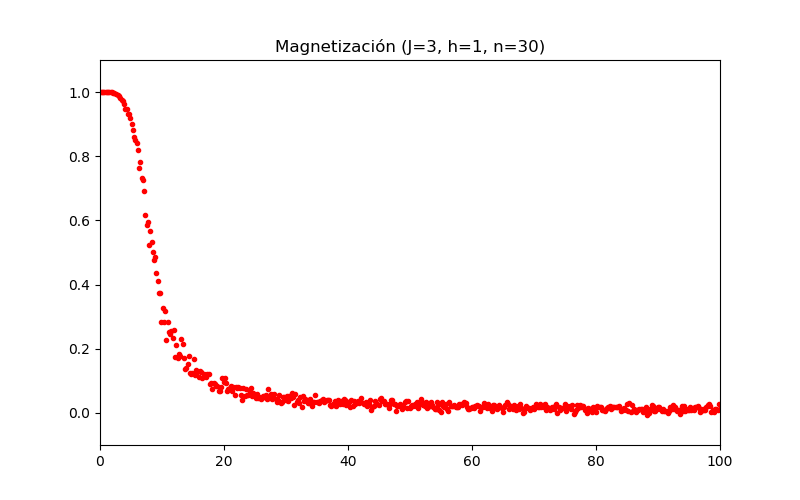

In [23]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(Temp,simon,'.',color='r')
plt.title('Magnetización (J={0}, h={1}, n={2})'.format(J,h,n))

plt.ylim(-0.1,1.1)
plt.xlim(0,100)
plt.show()